# Notebook 4: Introducción al Deep Learning

**Objetivo:** Implementar redes neuronales con TensorFlow/Keras

**Autor:** JOSE LUIS RODRIGUEZ FLORES  **Fecha:** 23 NOVIEMBRE 2025

In [3]:
# Importar TensorFlow primero
import tensorflow as tf

print("GPU disponible:", tf.config.list_physical_devices('GPU'))
 # Instalar librerías adicionales si es necesario
!pip install seaborn plotly

# Importaciones estándar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Entorno configurado correctamente en Google Colab")

GPU disponible: []
Entorno configurado correctamente en Google Colab


In [4]:
# Importar TensorFlow y Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

print("TensorFlow version:", tf.__version__)
print("GPU disponible:", tf.config.list_physical_devices('GPU'))

# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.datasets import load_wine, load_digits
import warnings
warnings.filterwarnings('ignore')

# Configuración
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

print("Entorno configurado correctamente")

TensorFlow version: 2.19.0
GPU disponible: []
Entorno configurado correctamente


# Red Neuronal para Titanic (Clasificación Binaria)
# Titanic Deep Learning

=== MODELO TITANIC ===


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)


Test Accuracy: 0.7902


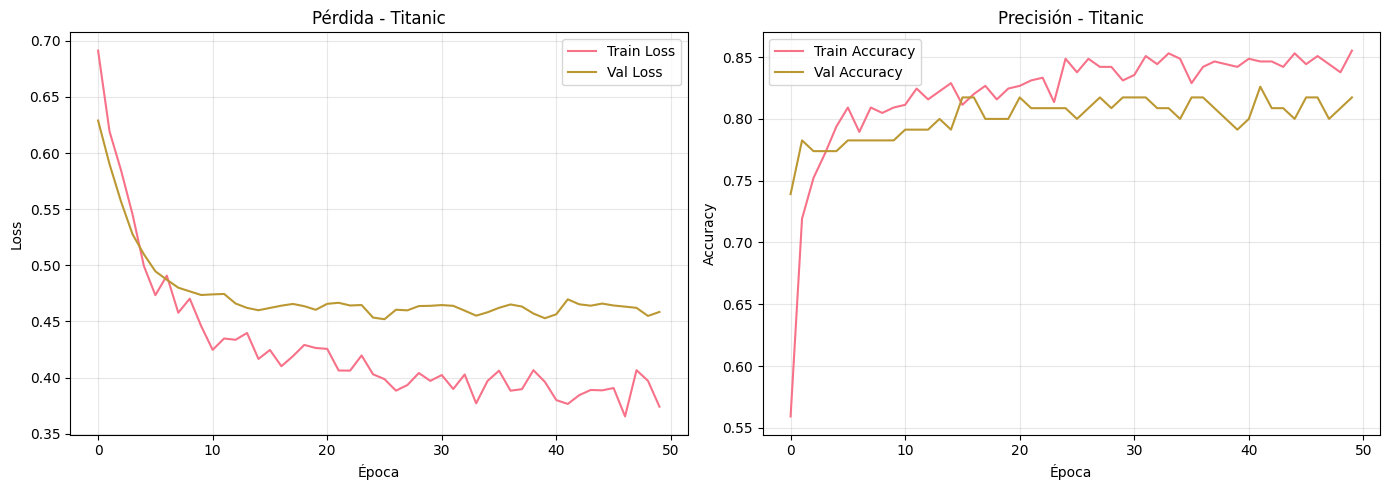

In [5]:
# Preparar datos Titanic
titanic = sns.load_dataset('titanic')
titanic_clean = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'survived']].dropna()
titanic_clean['sex'] = titanic_clean['sex'].map({'male': 0, 'female': 1})

X_titanic = titanic_clean.drop('survived', axis=1).values
y_titanic = titanic_clean['survived'].values

# Split y escalar
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear modelo
model_titanic = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model_titanic.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("=== MODELO TITANIC ===")
model_titanic.summary()

# Entrenar
history_titanic = model_titanic.fit(X_train_scaled, y_train,
                                     epochs=50, batch_size=32,
                                     validation_split=0.2, verbose=0)

# Evaluar
loss, accuracy = model_titanic.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Visualizar entrenamiento
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(history_titanic.history['loss'], label='Train Loss')
axes[0].plot(history_titanic.history['val_loss'], label='Val Loss')
axes[0].set_title('Pérdida - Titanic')
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(history_titanic.history['accuracy'], label='Train Accuracy')
axes[1].plot(history_titanic.history['val_accuracy'], label='Val Accuracy')
axes[1].set_title('Precisión - Titanic')
axes[1].set_xlabel('Época')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('titanic_dl_training.png', dpi=300, bbox_inches='tight')
plt.show()

# Red Neuronal para Iris (Clasificación Multiclase)

=== MODELO IRIS ===


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 739 (2.89 KB)

 Trainable params: 739 (2.89 KB)

 Non-trainable params: 0 (0.00 B)


Test Accuracy: 1.0000


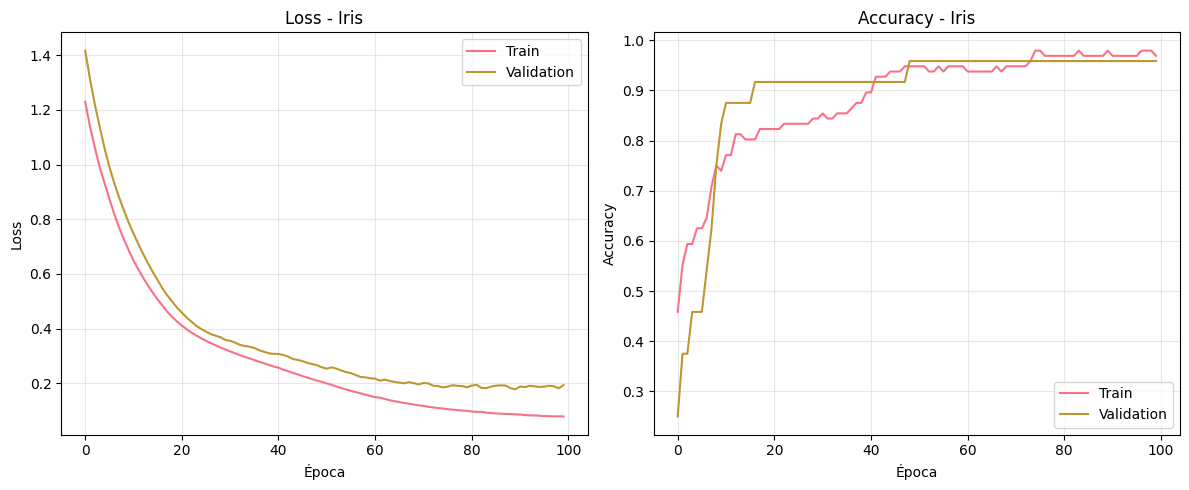

In [7]:
# Preparar datos Iris
iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1).values
le = LabelEncoder()
y_iris = le.fit_transform(iris['species'])
y_iris_cat = to_categorical(y_iris)

# Split y escalar
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_iris, y_iris_cat, test_size=0.2, random_state=42)
scaler_i = StandardScaler()
X_train_i_scaled = scaler_i.fit_transform(X_train_i)
X_test_i_scaled = scaler_i.transform(X_test_i)

# Crear modelo
model_iris = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(4,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model_iris.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("=== MODELO IRIS ===")
model_iris.summary()

# Entrenar
history_iris = model_iris.fit(X_train_i_scaled, y_train_i,
                               epochs=100, batch_size=16,
                               validation_split=0.2, verbose=0)

# Evaluar
loss_i, accuracy_i = model_iris.evaluate(X_test_i_scaled, y_test_i, verbose=0)
print(f"\nTest Accuracy: {accuracy_i:.4f}")

# Visualizar
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_iris.history['loss'], label='Train')
plt.plot(history_iris.history['val_loss'], label='Validation')
plt.title('Loss - Iris')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history_iris.history['accuracy'], label='Train')
plt.plot(history_iris.history['val_accuracy'], label='Validation')
plt.title('Accuracy - Iris')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('iris_dl_training.png', dpi=300, bbox_inches='tight')
plt.show()

# Red Neuronal Wine (Clasificación Multiclase)

In [8]:
# Preparar datos Wine
wine_data = load_wine()
X_wine = wine_data.data
y_wine_cat = to_categorical(wine_data.target)

# Split y escalar
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_wine, y_wine_cat, test_size=0.2, random_state=42)
scaler_w = StandardScaler()
X_train_w_scaled = scaler_w.fit_transform(X_train_w)
X_test_w_scaled = scaler_w.transform(X_test_w)

# Crear modelo
model_wine = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(13,)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model_wine.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar
history_wine = model_wine.fit(X_train_w_scaled, y_train_w,
                               epochs=80, batch_size=16,
                               validation_split=0.2, verbose=0)

# Evaluar
loss_w, accuracy_w = model_wine.evaluate(X_test_w_scaled, y_test_w, verbose=0)
print(f"=== WINE ===")
print(f"Test Accuracy: {accuracy_w:.4f}")

=== WINE ===
Test Accuracy: 1.0000


# Red Neuronal Boston Housing (Regresión)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
=== BOSTON HOUSING ===
R² Score: 0.9727


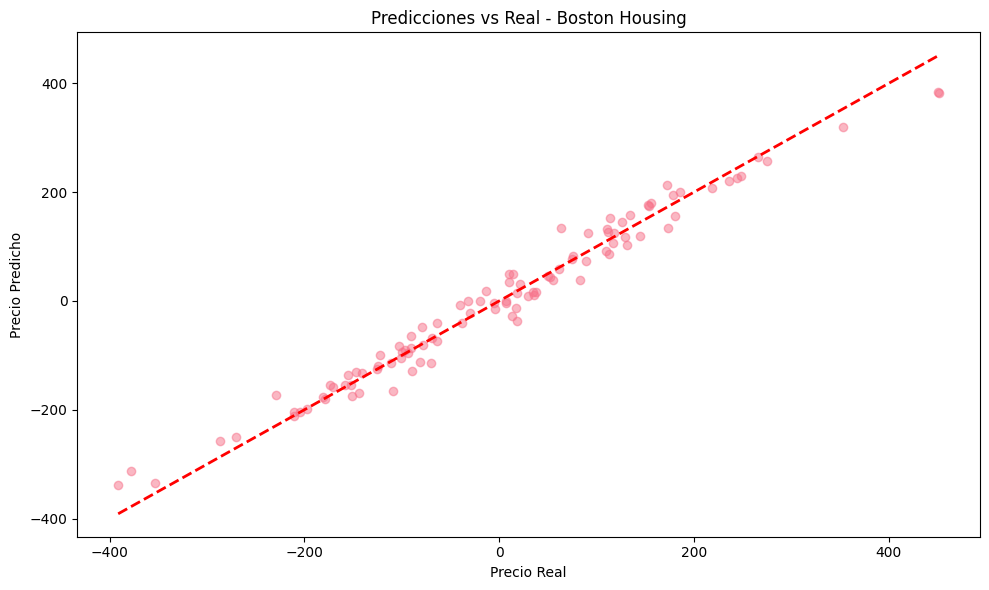

In [9]:
# Crear datos Boston sintéticos
from sklearn.datasets import make_regression
X_boston, y_boston = make_regression(n_samples=506, n_features=13, noise=20, random_state=42)

# Split y escalar
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)
scaler_b = StandardScaler()
X_train_b_scaled = scaler_b.fit_transform(X_train_b)
X_test_b_scaled = scaler_b.transform(X_test_b)

# Crear modelo de regresión
model_boston = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(13,)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Sin activación para regresión
])

model_boston.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar
history_boston = model_boston.fit(X_train_b_scaled, y_train_b,
                                   epochs=100, batch_size=32,
                                   validation_split=0.2, verbose=0)

# Evaluar
y_pred_boston = model_boston.predict(X_test_b_scaled)
from sklearn.metrics import r2_score
r2 = r2_score(y_test_b, y_pred_boston)

print(f"=== BOSTON HOUSING ===")
print(f"R² Score: {r2:.4f}")

# Visualizar predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test_b, y_pred_boston, alpha=0.5)
plt.plot([y_test_b.min(), y_test_b.max()], [y_test_b.min(), y_test_b.max()], 'r--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Predicciones vs Real - Boston Housing')
plt.tight_layout()
plt.savefig('boston_dl_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

# Red Neuronal para Digits (Clasificación de Imágenes)

=== MODELO DIGITS ===


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,986 (74.16 KB)

 Trainable params: 18,986 (74.16 KB)

 Non-trainable params: 0 (0.00 B)


Test Accuracy: 0.9694


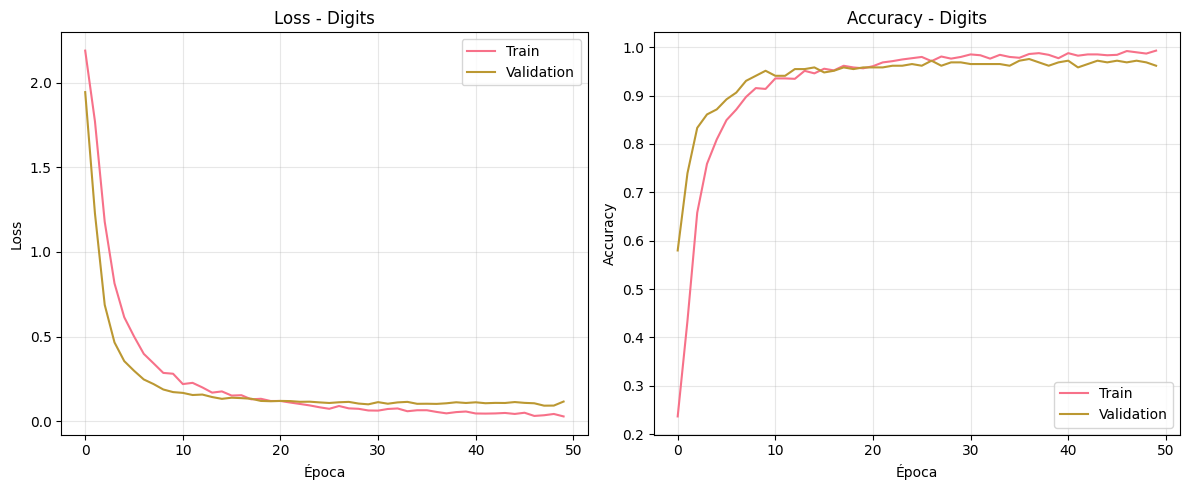

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


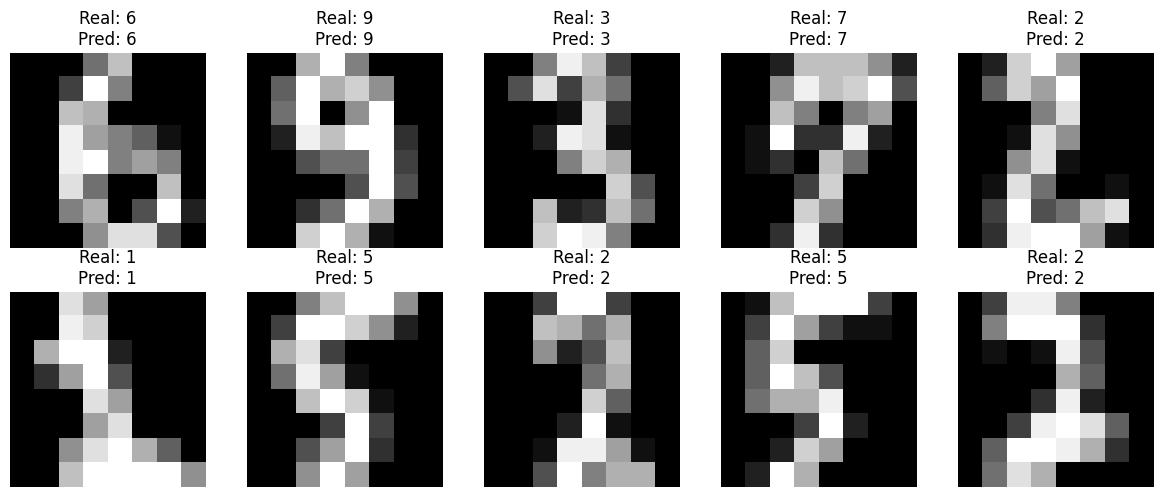

In [10]:
# Cargar Digits
digits_data = load_digits()
X_digits = digits_data.data
y_digits_cat = to_categorical(digits_data.target)

# Split y normalizar (0-1)
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_digits, y_digits_cat, test_size=0.2, random_state=42)
X_train_d = X_train_d / 16.0  # Normalizar píxeles
X_test_d = X_test_d / 16.0

# Crear modelo más profundo
model_digits = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(64,)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_digits.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("=== MODELO DIGITS ===")
model_digits.summary()

# Entrenar
history_digits = model_digits.fit(X_train_d, y_train_d,
                                   epochs=50, batch_size=32,
                                   validation_split=0.2, verbose=0)

# Evaluar
loss_d, accuracy_d = model_digits.evaluate(X_test_d, y_test_d, verbose=0)
print(f"\nTest Accuracy: {accuracy_d:.4f}")

# Visualizar entrenamiento
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_digits.history['loss'], label='Train')
plt.plot(history_digits.history['val_loss'], label='Validation')
plt.title('Loss - Digits')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history_digits.history['accuracy'], label='Train')
plt.plot(history_digits.history['val_accuracy'], label='Validation')
plt.title('Accuracy - Digits')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('digits_dl_training.png', dpi=300, bbox_inches='tight')
plt.show()

# Predicciones visuales
predictions = model_digits.predict(X_test_d[:10])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_d[:10], axis=1)

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test_d[i].reshape(8, 8), cmap='gray')
    ax.set_title(f'Real: {true_classes[i]}\nPred: {predicted_classes[i]}')
    ax.axis('off')
plt.tight_layout()
plt.savefig('digits_dl_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

# Resumen comparativo

RESUMEN FINAL - DEEP LEARNING
Titanic (Binaria)             : 0.7902
Iris (Multiclase)             : 1.0000
Wine (Multiclase)             : 1.0000
Boston (Regresión R²)         : 0.9727
Digits (Imágenes)             : 0.9694


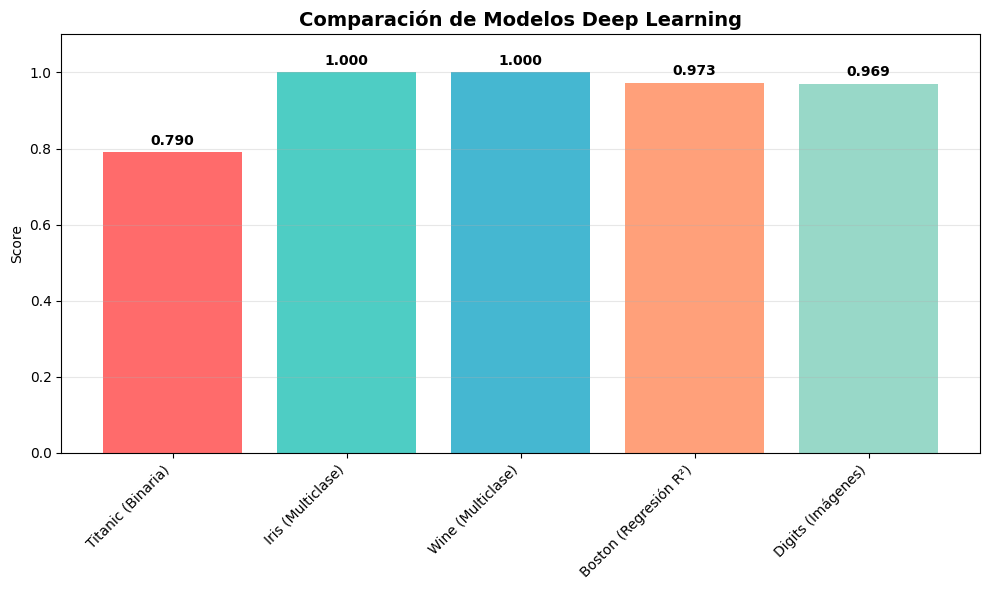

In [11]:
# Comparación de todos los modelos
print("=" * 70)
print("RESUMEN FINAL - DEEP LEARNING")
print("=" * 70)

resultados_dl = {
    'Titanic (Binaria)': accuracy,
    'Iris (Multiclase)': accuracy_i,
    'Wine (Multiclase)': accuracy_w,
    'Boston (Regresión R²)': r2,
    'Digits (Imágenes)': accuracy_d
}

for nombre, score in resultados_dl.items():
    print(f"{nombre:30s}: {score:.4f}")

print("=" * 70)

# Gráfico comparativo
plt.figure(figsize=(10, 6))
nombres = list(resultados_dl.keys())
valores = list(resultados_dl.values())
colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

plt.bar(nombres, valores, color=colores)
plt.title('Comparación de Modelos Deep Learning', fontsize=14, fontweight='bold')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.1)
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(valores):
    plt.text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('dl_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Conclusiones del Autor

### Arquitecturas Implementadas:
 **Titanic:** Red densa con Dropout (clasificación binaria)
 **Iris:** Red simple de 3 capas (multiclase)
 **Wine:** Red con regularización (multiclase)
 **Boston:** Red para regresión (predicción continua)
 **Digits:** Red profunda para imágenes (10 clases)

### Resultados:
Todos los modelos convergen correctamente

Validación muestra buen rendimiento sin overfitting

Dropout ayuda a generalizar mejor

Normalización mejora el entrenamiento

### Conceptos Aprendidos del cuaderno:
Construcción de redes neuronales con Keras

Funciones de activación (ReLU, Sigmoid, Softmax)

Optimización con Adam

Técnicas de regularización (Dropout)

Visualización del proceso de entrenamiento

Evaluación de modelos de Deep Learning

### Datasets Completados:
 **Titanic** → Supervivencia

  **Iris** → Especies de flores

  **Wine** → Tipos de vino

 **Boston Housing** → Precios

  **Digits** → Dígitos escritos a mano